## Regresión Logística
Se utiliza en fenómenos discretos.Se asumen 1 y 0. Los errores, que considerabamos en el modelo lineal pierden relevancia.

$$log \frac{Pr(Y1)}{1 - Pr(Y1)} = \beta_0 + \sum_{j=1}^N \beta_j X = m$$

Probabilidad de y:
$$ Pr(Yi)= \frac{e^m}{(1 + e^m)}$$
Asi le puedo asignar un 1 o un 0 dependiendo si la prob me da mayor a .5 o menor .5

### Desafio 1:
- Se detallan los pasos a seguir
- tip: Los tips o sugerencias preceden de tip
- Se generan dos notebooks, uno con las soluciones y otro con los ejercicios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("southafricanheart.csv").drop(columns=["Unnamed: 0"])
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


### Desafio 2:
- A continuación se presenta el siguiente modelo a estimar:
- Para ello ejecute los siguientes pasos:
    1. Recodifique famhist a dummy, asignando 1 a la categoría minoritaria.
    2. Utilice smf.logit para estimar el modelo.

In [3]:
df["famhist"].value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

In [4]:
#df["famhist"].replace(["Absent","Present"], [0,1])
df["famhist"] = np.where(df["famhist"] == "Present", 1, 0)

In [5]:
formula_0 = "chd ~ famhist"
model_0 = smf.logit(formula_0, df).fit()

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


In [6]:
model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:                 0.05740
Time:                        23:06:59   Log-Likelihood:                -280.95
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 4.937e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1690      0.143     -8.169      0.000      -1.449      -0.889
famhist        1.1690      0.203      5.751      0.000       0.771       1.567
==============================================================================
"""

In [7]:
#model.score(df)

  3. Implemente una función inverse_logit que realize el mapeo de log-odds a probabilidad.

In [8]:
def inverse_logit(log_odds):
    return np.exp(log_odds) / ( 1 + np.exp(log_odds))

  4. Con el modelo estimado, responda lo siguiente:
        - ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una
enfermedad coronaria?
        - ¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener una
enfermedad coronaria?
        - ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin
antecedentes?

In [9]:
prob_con_famhist = inverse_logit(model_0.params["Intercept"] + model_0.params["famhist"]*1)
print("La probabilidad de que una persona con antecedentes familiares tenga una enfermedad coronaria es: ", prob_con_famhist)

La probabilidad de que una persona con antecedentes familiares tenga una enfermedad coronaria es:  0.4999999999999999


In [10]:
prob_sin_famhist = inverse_logit(model_0.params["Intercept"]+ model_0.params["famhist"]*0)
print("La probabilidad de que una persona sin antecedentes familiares tenga una enfermedad coronaria es: ", prob_sin_famhist)

La probabilidad de que una persona sin antecedentes familiares tenga una enfermedad coronaria es:  0.23703703703703705


- Replique el modelo con smf.ols 

In [11]:
ols = smf.ols(formula_0, df).fit()

In [12]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     36.86
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           2.66e-09
Time:                        23:07:00   Log-Likelihood:                -294.59
No. Observations:                 462   AIC:                             593.2
Df Residuals:                     460   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2370      0.028      8.489      0.000       0.182       0.292
famhist        0.2630      0.043      6.071      0.000       0.178       0.348
==============================================================================
Omnibus:                      768.898   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.778
Skew:                           0.579   Prob(JB):                     1.72e-13
Kurtosis:                       1.692   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comente las similitudes entre los coeficientes estimados.
- tip: Utilice B/4

A medida que más cercano a la media nos encontremos mayor sera las similitudes de los modelos.

In [13]:
model_0.params/4

Intercept   -0.292248
famhist      0.292248
dtype: float64

In [14]:
ols.params

Intercept    0.237037
famhist      0.262963
dtype: float64

- Estime el mismo modelo con LPM

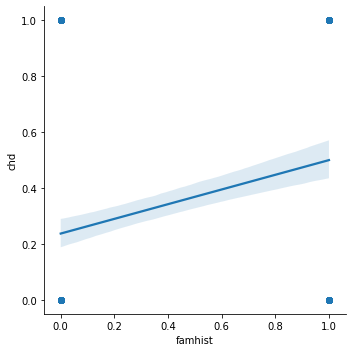

In [15]:
sns.lmplot("famhist", "chd", df)

### Desafio 3:
- Implemente un modelo con la siguiente forma
$$log \frac{Pr(chd = 1)}{1 - Pr(chd = 1)} = \beta_0 + \sum_{j=1}^N \beta_j X$$
- Depure el modelo manteniendo las variables con significancia estadística al 95%.

In [16]:
def formula(df, vble_y , drop):
    preffix = vble_y +" ~ "
    formula = ""

    for i in df.drop(columns=drop).columns:
        formula +=f"{i} + "
    formula = formula.strip(" + ")

    return preffix + formula

In [17]:
def filtrado(modelo, trae_mayor_a):
    
    rtado = modelo.summary2().tables[1]
    display(rtado)
    
    filtrar = rtado[rtado['P>|z|']>trae_mayor_a].sort_values(by = 'P>|z|',ascending= False)
    print(f"\nLas variables a quitar son: {list(filtrar.index)}")
    return filtrar   

In [18]:
# def check_pvalues(model):
#     if model.pvalues.max()>.05:
#         print(model.pvalues.idmax())

#### Modelo 1:

In [19]:
formula_1 = formula(df, 'chd', ['chd'])
print(f"El modelo es: {formula_1}\n")

model_1 = smf.logit(formula_1, df).fit()

filtrado(model_1,.05)

El modelo es: chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + alcohol + age

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.150721,1.308260,-4.701451,0.000003,-8.714863,-3.586578
sbp,0.006504,0.005730,1.135003,0.256374,-0.004727,0.017735
tobacco,0.079376,0.026603,2.983758,0.002847,0.027236,0.131517
ldl,0.173924,0.059662,2.915166,0.003555,0.056989,0.290859
adiposity,0.018587,0.029289,0.634583,0.525700,-0.038820,0.075993
famhist,0.925370,0.227894,4.060530,0.000049,0.478706,1.372034
typea,0.039595,0.012320,3.213823,0.001310,0.015448,0.063742
obesity,-0.062910,0.044248,-1.421764,0.155095,-0.149634,0.023814
alcohol,0.000122,0.004483,0.027137,0.978350,-0.008665,0.008909
age,0.045225,0.012130,3.728464,0.000193,0.021451,0.068999



Las variables a quitar son: ['alcohol', 'adiposity', 'sbp', 'obesity']


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
alcohol,0.000122,0.004483,0.027137,0.978350,-0.008665,0.008909
adiposity,0.018587,0.029289,0.634583,0.525700,-0.038820,0.075993
sbp,0.006504,0.005730,1.135003,0.256374,-0.004727,0.017735
obesity,-0.062910,0.044248,-1.421764,0.155095,-0.149634,0.023814


#### Modelo 2:

In [20]:
formula_2 = formula(df, 'chd', ['chd','alcohol'])
print(f"El modelo es: {formula_2}\n")

model_2 = smf.logit(formula_2, df).fit()

filtrado(model_2,.05)

El modelo es: chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + age

Optimization terminated successfully.
         Current function value: 0.510975
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.150058,1.308008,-4.701851,0.000003,-8.713706,-3.586410
sbp,0.006524,0.005685,1.147562,0.251149,-0.004618,0.017666
tobacco,0.079515,0.026114,3.044965,0.002327,0.028333,0.130696
ldl,0.173770,0.059393,2.925771,0.003436,0.057362,0.290178
adiposity,0.018631,0.029245,0.637070,0.524079,-0.038688,0.075949
famhist,0.925831,0.227266,4.073768,0.000046,0.480397,1.371265
typea,0.039604,0.012316,3.215646,0.001302,0.015465,0.063743
obesity,-0.062957,0.044216,-1.423854,0.154489,-0.149618,0.023704
age,0.045191,0.012061,3.746762,0.000179,0.021551,0.068830



Las variables a quitar son: ['adiposity', 'sbp', 'obesity']


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
adiposity,0.018631,0.029245,0.637070,0.524079,-0.038688,0.075949
sbp,0.006524,0.005685,1.147562,0.251149,-0.004618,0.017666
obesity,-0.062957,0.044216,-1.423854,0.154489,-0.149618,0.023704


#### Modelo 3

In [21]:
formula_3 = formula(df, 'chd', ['chd','alcohol','adiposity'])
print(f"El modelo es: {formula_3}\n")

model_3 = smf.logit(formula_3, df).fit()

filtrado(model_3,.05)

El modelo es: chd ~ sbp + tobacco + ldl + famhist + typea + obesity + age

Optimization terminated successfully.
         Current function value: 0.511417
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.416927,1.240101,-5.174520,2.284973e-07,-8.847480,-3.986374
sbp,0.006780,0.005683,1.193028,2.328585e-01,-0.004358,0.017918
tobacco,0.079886,0.026157,3.054054,2.257712e-03,0.028619,0.131154
ldl,0.182102,0.058077,3.135530,1.715439e-03,0.068273,0.295930
famhist,0.924464,0.227061,4.071433,4.672477e-05,0.479433,1.369496
typea,0.038966,0.012266,3.176633,1.489952e-03,0.014924,0.063007
obesity,-0.042200,0.029437,-1.433573,1.516942e-01,-0.099895,0.015495
age,0.048927,0.010556,4.634888,3.571307e-06,0.028237,0.069616



Las variables a quitar son: ['sbp', 'obesity']


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
sbp,0.00678,0.005683,1.193028,0.232859,-0.004358,0.017918
obesity,-0.04220,0.029437,-1.433573,0.151694,-0.099895,0.015495


#### Modelo 4:

In [22]:
formula_4 = formula(df, 'chd', ['chd','alcohol','adiposity','sbp'])
print(f"El modelo es: {formula_4}\n")

model_4 = smf.logit(formula_4, df).fit()

filtrado(model_4,.05)

El modelo es: chd ~ tobacco + ldl + famhist + typea + obesity + age

Optimization terminated successfully.
         Current function value: 0.512965
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-5.702726,1.076397,-5.297978,1.170919e-07,-7.812425,-3.593027
tobacco,0.079989,0.025978,3.079124,2.076103e-03,0.029073,0.130905
ldl,0.183715,0.058178,3.157818,1.589547e-03,0.069689,0.297742
famhist,0.916096,0.226448,4.045500,5.221152e-05,0.472266,1.359926
typea,0.038274,0.012218,3.132502,1.733231e-03,0.014326,0.062221
obesity,-0.037597,0.029101,-1.291946,1.963757e-01,-0.094634,0.019440
age,0.052111,0.010243,5.087493,3.628271e-07,0.032035,0.072187



Las variables a quitar son: ['obesity']


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
obesity,-0.037597,0.029101,-1.291946,0.196376,-0.094634,0.01944


#### Modelo 5:

In [23]:
formula_5 = formula(df, 'chd', ['chd','alcohol','adiposity','sbp','obesity'])
print(f"El modelo es: {formula_5}\n")

model_5 = smf.logit(formula_5, df).fit()

El modelo es: chd ~ tobacco + ldl + famhist + typea + age

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


#### Conclusiones:
- Compare los estadísticos de bondad de ajuste entre ambos.

In [24]:
def comparacion_modelos(lista_modelos):
    AIC = []
    BIC = []
    Log_Likelihood = []
    LLR_p_value = []
    
    for i in lista_modelos:
        AIC.append(round(i.aic,2))
        BIC.append(round(i.bic,2))
        Log_Likelihood.append(round(i.llf,2))
        LLR_p_value.append(round(i.llr_pvalue,10))
        
    modelos = pd.DataFrame({"AIC": AIC,
                            "BIC": BIC,
                            "Log_Likelihood": Log_Likelihood,
                             "LLR_p_value": LLR_p_value})
    return modelos      

In [25]:
comparacion_modelos = comparacion_modelos([model_0, model_1, model_2, model_3, model_4, model_5])

In [26]:
comparacion_modelos["Modelos"] = [formula_0, formula_1, formula_2, formula_3, formula_4, formula_5]
comparacion_modelos

,AIC,BIC,Log_Likelihood,LLR_p_value,Modelos
0,565.89,574.17,-280.95,4.900000e-09,chd ~ famhist
1,492.14,533.50,-236.07,0.000000e+00,chd ~ sbp + tobacco + ldl + adiposity + famhis...
2,490.14,527.36,-236.07,0.000000e+00,chd ~ sbp + tobacco + ldl + adiposity + famhis...
3,488.55,521.63,-236.27,0.000000e+00,chd ~ sbp + tobacco + ldl + famhist + typea + ...
4,487.98,516.93,-236.99,0.000000e+00,chd ~ tobacco + ldl + famhist + typea + obesit...
5,487.69,512.50,-237.84,0.000000e+00,chd ~ tobacco + ldl + famhist + typea + age


In [27]:
print(f"Modelo 1: {formula_1}")
display(model_1.summary2().tables[0])
print(f"\nModelo 5: {formula_5}")
display(model_5.summary2().tables[0])

Modelo 1: chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + alcohol + age


,0,1,2,3
0,Model:,Logit,Pseudo R-squared:,0.208
1,Dependent Variable:,chd,AIC:,492.1400
2,Date:,2020-12-05 23:07,BIC:,533.4957
3,No. Observations:,462,Log-Likelihood:,-236.07
4,Df Model:,9,LL-Null:,-298.05
5,Df Residuals:,452,LLR p-value:,2.0548e-22
6,Converged:,1.0000,Scale:,1.0000
7,No. Iterations:,6.0000,,



Modelo 5: chd ~ tobacco + ldl + famhist + typea + age


,0,1,2,3
0,Model:,Logit,Pseudo R-squared:,0.202
1,Dependent Variable:,chd,AIC:,487.6856
2,Date:,2020-12-05 23:07,BIC:,512.4990
3,No. Observations:,462,Log-Likelihood:,-237.84
4,Df Model:,5,LL-Null:,-298.05
5,Df Residuals:,456,LLR p-value:,2.5537e-24
6,Converged:,1.0000,Scale:,1.0000
7,No. Iterations:,6.0000,,


Vemos por los criterios de AIC, BIC y Log Likelihood que el modelo 5 que contiene unicamente las variables que tienen significancia estadistica es mejor al modelo 1.

- Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria

In [28]:
modelo = model_5.summary2().tables[1][['Coef.']]
modelo

,Coef.
Intercept,-6.446445
tobacco,0.080375
ldl,0.161992
famhist,0.908175
typea,0.037115
age,0.050460


### Desafío 4: 

- A partir  del  modelo depurado,  genere  las  estimaciones  en  log-odds  y  posteriormente  transfórmelas a probabilidades con  inverse_logit . Los perfiles a estimar son los siguientes:
    - La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra (media).
    - La probabilidad de tener una enfemerdad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.
    - La probabilidad de tener una enfemerdad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.

In [29]:
#model_5.params.index
formula_5

'chd ~ tobacco + ldl + famhist + typea + age'

In [30]:
df_filtrado =df[["tobacco", "ldl", "famhist","typea", "age"]]

Intercep+ params[tobacco]+ media_tobacco+...

In [31]:
result = 0
for i in model_5.params.index:
    if i == 'Intercept':
        result += model_5.params[i]
    else:
        result += model_5.params[i] * df_filtrado[i].mean()

print(f"La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra es de: {round(inverse_logit(result),4)}")

La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra es de: 0.2937


In [32]:
result1 = 0
for i in model_5.params.index:  
    if i == "Intercept":
        result1 += model_5.params[i]
    elif i == "ldl":
        result1 += model_5.params[i] * df_filtrado[i].quantile(0.75)
    else:
        result1 += model_5.params[i] * df_filtrado[i].mean()

print(f"La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína es: {round(inverse_logit(result1),4)}")

La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína es: 0.3302


In [33]:
result2 = 0
for i in model_5.params.index:    
    if i == "Intercept":
        result2 += model_5.params[i]
    elif i == "ldl":
        result2 += model_5.params[i] * df_filtrado[i].quantile(0.25)
    else:
        result2 += model_5.params[i] * df_filtrado[i].mean()

print(f"La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína es: {round(inverse_logit(result2),4)}")

La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína es: 0.2472
